(launch:thebe)=
# String and beam system
click the {fa}`rocket` --> {guilabel}`Live Code` button above on this page, and run the code below.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

from PIL import Image

Given, the string and beam system from the image below, the objective is to maximize the $X_1$ and $X_2$ loads, knowing that the maximum load for $A$ and $B$ is 300, for $C$ and $D$ is 200, and for $E$ and $F$ is 100.

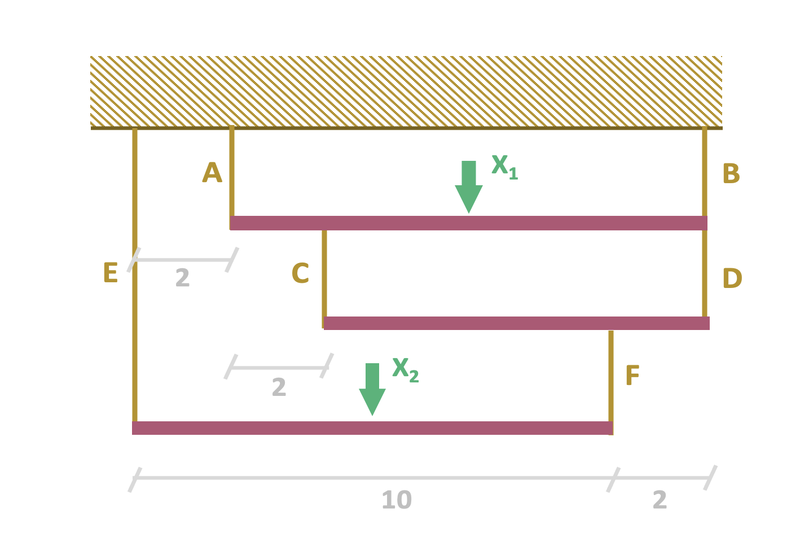

In [2]:
Image.open('./resources/sketch_vigas.png').resize((800, 550), Image.LANCZOS)

**First, we define the equilibrium equations:**

$$t_E + t_F = X_2$$

$$t_C + t_D = t_F$$

$$t_A + t_B = X_1 + t_C + t_D$$

**Then, we obtain the equations for the momentum equilibrium in A, C and E**

$$10 t_F = 5 X_2$$

$$8 t_D = 6 t_F$$

$$10 t_B = 5 X_1 + 2 t_C + 10 t_D$$

Assuming that $X_1$ and $X_2$ are positive, we can solve the equations so that:

$$ {X_2 \over 2} \leq 100$$

$$ {3 X_2 \over 8} \leq 200$$

$$ {X_2 \over 8} \leq 200$$

$$ {X_1 \over 2} + {2 X_2 \over 5} \leq 300$$

$$ {X_1 \over 2} + {X_2 \over 10} \leq 300$$

$$X_1 \geq 0$$

$$X_2 \geq 0$$

As some of these conditions are more restrictive than others, we can reduce them to:

$$ 0 \leq X_2 \leq 200$$

$$ 4 X_2 + 5 X_1 \leq 3000$$

$$X_1 \geq 0$$

1) **Define the objective function**

The objective function has to maximize the total load:

$$Z=X_1 + X_2$$

As scipy can only minimize, we will do:

$$-Z=-X_1  -X_2$$ 

In [3]:
obj = [-1, -1]

2) **Define the inequalities**

Structure: 

$$X_1 + X_2$$

In [4]:
#Left side of the equality
lhs_eq = [[5, 4],
        ]  

#Right of the equality
rhs_eq = [3000] 

3) **Define the bounds**

The loads need to be positive

$$X_1\geq 0, X_2 \geq 0$$

In [5]:
bnd = [(0, np.inf), (0, 200)]  # Bounds of x1, x2

4) **Optimize**

Apply the scipy ***linprog*** function

In [6]:
opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd)
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -640.0
              x: [ 4.400e+02  2.000e+02]
            nit: 0
          lower:  residual: [ 4.400e+02  2.000e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf  0.000e+00]
                 marginals: [ 0.000e+00 -2.000e-01]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.000e-01]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [7]:
print('The optimal solution is: X0 = {0}, X1 = {1}'.format(opt.x[0], opt.x[1]))

The optimal solution is: X0 = 440.0, X1 = 200.0
